## Prog 5
Decision Tree

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./datasets/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
df.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
df["workclass"] = df["workclass"].replace("?", np.nan)
df["occupation"] = df["occupation"].replace("?", np.nan)
df["native-country"] = df["native-country"].replace("?", np.nan)

In [9]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
df.dropna(how="any", inplace=True)
print(f"There are {df.duplicated} values")

There are <bound method DataFrame.duplicated of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black   

In [11]:
df = df.drop_duplicates()

In [13]:
df.shape

(45175, 15)

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [15]:
df.drop(["fnlwgt", "educational-num", "marital-status", "relationship", "race"], axis=1, inplace=True)

In [16]:
df.columns

Index(['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [17]:
x = df.loc[:,['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country']]
y = df.loc[:,"income"]


In [18]:
x.head()

,age,workclass,education,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Machine-op-inspct,Male,0,0,40,United-States
1,38,Private,HS-grad,Farming-fishing,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,0,0,40,United-States
3,44,Private,Some-college,Machine-op-inspct,Male,7688,0,40,United-States
5,34,Private,10th,Other-service,Male,0,0,30,United-States


In [19]:
y = LabelEncoder().fit_transform(y)
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,1
3,1
4,0


In [22]:
num_ft = x.select_dtypes('number')
cat_ft = x.select_dtypes("object")
cat_ft

,workclass,education,occupation,gender,native-country
0,Private,11th,Machine-op-inspct,Male,United-States
1,Private,HS-grad,Farming-fishing,Male,United-States
2,Local-gov,Assoc-acdm,Protective-serv,Male,United-States
3,Private,Some-college,Machine-op-inspct,Male,United-States
5,Private,10th,Other-service,Male,United-States
...,...,...,...,...,...
48837,Private,Assoc-acdm,Tech-support,Female,United-States
48838,Private,HS-grad,Machine-op-inspct,Male,United-States
48839,Private,HS-grad,Adm-clerical,Female,United-States
48840,Private,HS-grad,Adm-clerical,Male,United-States


In [23]:
num_ft

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [24]:

new_cat = pd.get_dummies(cat_ft)
all_ft = [new_cat, num_ft]
newX = pd.concat(all_ft, axis=1, join="inner")
newX.shape

(45175, 84)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(newX, y, test_size=0.33, random_state=42)
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [26]:
y_pred = tree.predict(x_test)

In [28]:
predictions_df = pd.DataFrame()
predictions_df['precdicted_salary_class'] = y_pred
predictions_df['actual_salary_class'] = y_test[0].values
predictions_df

,precdicted_salary_class,actual_salary_class
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14903,0,0
14904,0,1
14905,0,0
14906,0,0


In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8195599678025222


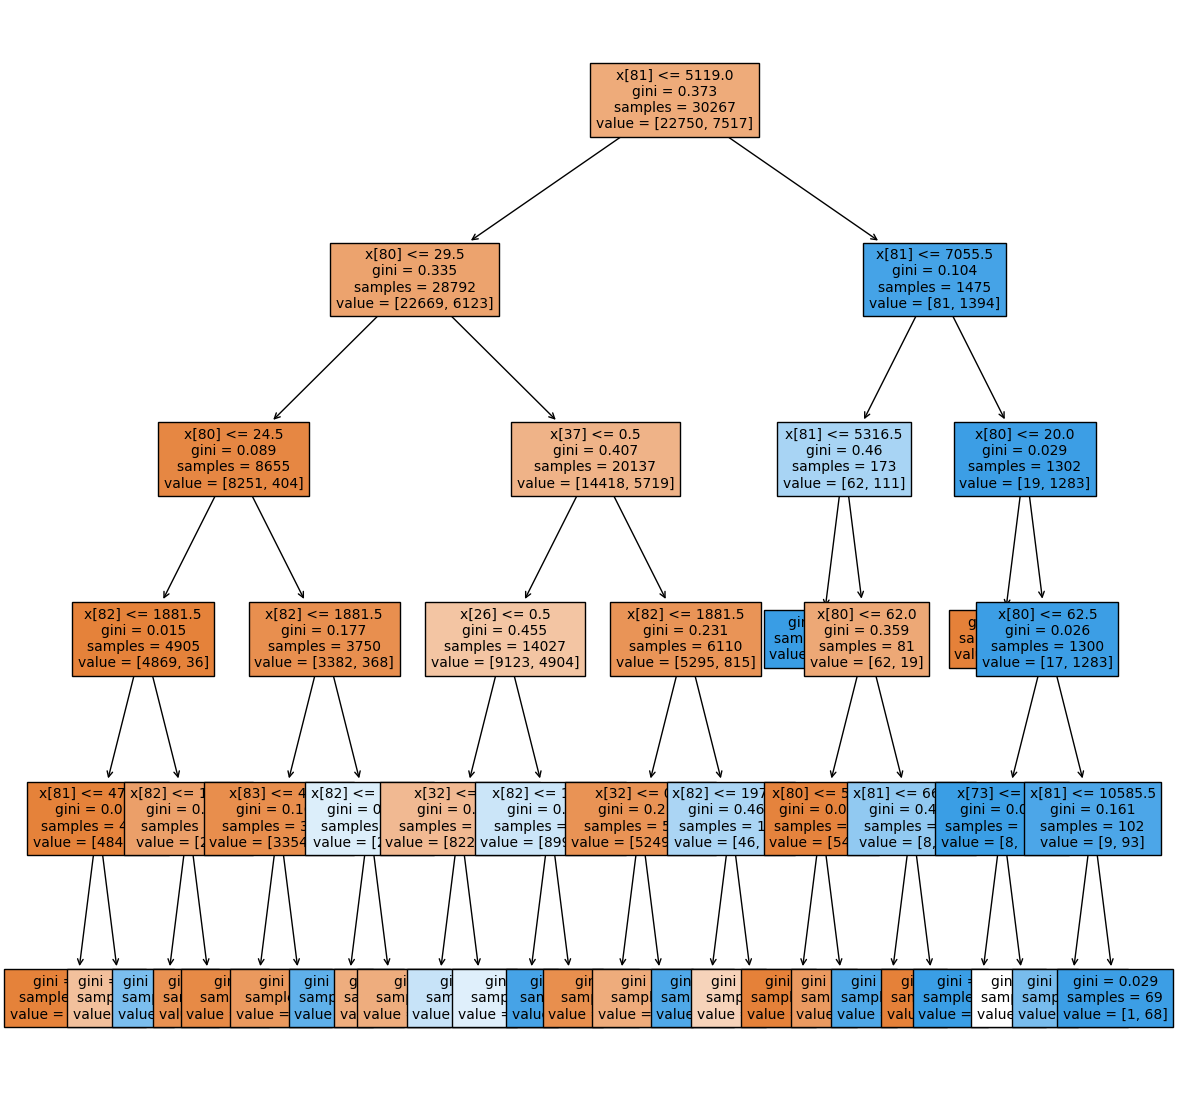

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(tree, fontsize=10, filled=True)
plt.show()